# Variations de taille de modèles pour la phase II

## imports

In [1]:
# Suppression des avertissements liés à Scikit-learn
import warnings  # Masquer les avertissements (ex. : FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Librairies générales
import pandas as pd  # Librairie pour la manipulation de données
import numpy as np  # Librairie pour le calcul numérique
import sys  # Fonctions et variables liées à l'interpréteur Python
import copy  # Création de copies d'objets
from numpy import mean, std  # Fonctions de calcul de moyenne et d'écart type
import zipfile  # Traitement de fichiers zip
import os  # Manipulation de fichiers et chemins

# Librairie affichage
import matplotlib.pyplot as plt  # Outils de visualisation 2D
from matplotlib import pyplot  # Interface de la bibliothèque Matplotlib
import seaborn as sns  # Bibliothèque de visualisation de données basée sur Matplotlib

# Scikit-learn pour l'évaluation des modèles
from sklearn.metrics import confusion_matrix  # Matrice de confusion
from sklearn.model_selection import KFold  # Outils de validation croisée
from sklearn.metrics import accuracy_score  # Calcul de l'accuracy
from sklearn.model_selection import train_test_split  # Découpage train/test

# TensorFlow et Keras
import tensorflow as tf  # Librairie de deep learning
import keras  # API haut niveau pour construire et entraîner des modèles de deep learning
from keras import layers  # Modules de couches pour construire des modèles Keras
from keras import models  # Outils pour créer des modèles Keras
from keras import optimizers  # Outils d'optimisation
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Générateur d'images pour l'augmentation des données
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping  # Rappels pour le suivi et l'arrêt précoce
from keras.layers import Input, Dense, Dropout, Flatten, Lambda  # Types de couches Keras
from keras.layers import Conv2D, MaxPooling2D  # Couches convolutionnelles et de pooling
from keras.preprocessing import image  # Outils de prétraitement d'images
from tensorflow.keras.models import Model, load_model  # Définition / chargement de modèles
from keras.datasets import fashion_mnist  # Jeu de données Fashion MNIST
from tensorflow.keras.utils import to_categorical  # Conversion en encodage one-hot
from tensorflow.keras.optimizers import SGD  # Optimiseur Stochastic Gradient Descent
from tensorflow.keras.applications.resnet50 import ResNet50  # Modèle ResNet50 pré-entraîné
from tensorflow.keras.preprocessing import image  # Prétraitement d'images pour les modèles Keras
from tensorflow.keras import regularizers  # Outils de régularisation pour les modèles Keras

## modèles

In [16]:
def define_model1(shapeinput=(256, 256, 3)):
    # Définir l'entrée
    inputs = Input(shape=shapeinput, name="Input_Layer")

    # conv
    x = Conv2D(2, (3, 3), activation='relu', name="Conv1_Layer")(inputs)
    x = MaxPooling2D((2, 2), name="Pool1_Layer")(x)
    x = Conv2D(3, (3, 3), activation='relu', name="Conv2_Layer")(x)
    x = MaxPooling2D((2, 2), name="Pool2_Layer")(x)
    x = Conv2D(6, (3, 3), activation='relu', name="Conv3_Layer")(x)
    x = MaxPooling2D((2, 2), name="Pool3_Layer")(x)
    x = Conv2D(8, (3, 3), activation='relu', name="Conv4_Layer")(x)
    x = MaxPooling2D((2, 2), name="Pool4_Layer")(x)
    x = Flatten(name="Flatten_Layer")(x)

    # Partie classification
    x = Dense(15, activation='relu', name="Dense1_Layer")(x)
    x = Dense(10, activation='relu', name="Dense2_Layer")(x)
    x = Dropout(0.2, name="Dropout_Layer")(x)
    outputs = Dense(3, activation='softmax', name="Output_Layer")(x)

    # Construction du modèle
    model = Model(inputs=inputs, outputs=outputs, name="CNN_MC_Model")

    # Compilation
    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    return model

In [17]:
def define_model2(shapeinput=(256, 256, 3)):
    # Définir l'entrée
    inputs = Input(shape=shapeinput, name="Input_Layer")

    # conv
    x = Conv2D(8, (3, 3), activation='relu', name="Conv1_Layer")(inputs)
    x = MaxPooling2D((2, 2), name="Pool1_Layer")(x)
    x = Conv2D(16, (3, 3), activation='relu', name="Conv2_Layer")(x)
    x = MaxPooling2D((2, 2), name="Pool2_Layer")(x)
    x = Conv2D(32, (3, 3), activation='relu', name="Conv3_Layer")(x)
    x = MaxPooling2D((2, 2), name="Pool3_Layer")(x)
    x = Conv2D(64, (3, 3), activation='relu', name="Conv4_Layer")(x)
    x = MaxPooling2D((2, 2), name="Pool4_Layer")(x)
    x = Flatten(name="Flatten_Layer")(x)

    # Partie classification
    x = Dense(20, activation='relu', name="Dense1_Layer")(x)
    x = Dense(10, activation='relu', name="Dense2_Layer")(x)
    x = Dropout(0.2, name="Dropout_Layer")(x)
    outputs = Dense(3, activation='softmax', name="Output_Layer")(x)

    # Construction du modèle
    model = Model(inputs=inputs, outputs=outputs, name="CNN_MC_Model")

    # Compilation
    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    return model

In [18]:
def define_model3(shapeinput=(256, 256, 3)):
    # Définir l'entrée
    inputs = Input(shape=shapeinput, name="Input_Layer")

    # conv
    x = Conv2D(2, (3, 3), activation='relu', name="Conv1_Layer")(inputs)
    x = MaxPooling2D((2, 2), name="Pool1_Layer")(x)
    x = Conv2D(3, (5, 5), activation='relu', name="Conv2_Layer")(x)
    x = MaxPooling2D((2, 2), name="Pool2_Layer")(x)
    x = Conv2D(6, (3, 3), activation='relu', name="Conv3_Layer")(x)
    x = MaxPooling2D((2, 2), name="Pool3_Layer")(x)
    x = Conv2D(8, (3, 3), activation='relu', name="Conv4_Layer")(x)
    x = MaxPooling2D((2, 2), name="Pool4_Layer")(x)
    x = Flatten(name="Flatten_Layer")(x)

    # Partie classification
    x = Dense(100, activation='relu', name="Dense1_Layer")(x)
    x = Dense(10, activation='relu', name="Dense2_Layer")(x)
    x = Dropout(0.2, name="Dropout_Layer")(x)
    outputs = Dense(3, activation='softmax', name="Output_Layer")(x)

    # Construction du modèle
    model = Model(inputs=inputs, outputs=outputs, name="CNN_MC_Model")

    # Compilation
    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    return model

## classes


In [19]:
batch_size = 32
img_height = 256
img_width = 256



# Charger les images d'un dossier
data_dir = "./data/dataset/sheep_cat_elephant_with_caption_600/images/"
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 1800 files belonging to 3 classes.
Using 1440 files for training.
Found 1800 files belonging to 3 classes.
Using 360 files for validation.


In [20]:
def evaluate_model(modelID, dataX, dataY, folds=5, epochs=10):
    """
    Évalue le modèle avec une validation croisée K-fold.

    Paramètres :
    - model : modèle de réseau de neurones Keras à évaluer.
    - dataX : données d'entrée pour l'entraînement et la validation.
    - dataY : étiquettes de sortie correspondantes.
    - folds : nombre de splits pour la validation croisée.
    - epochs : nombre d'époques pour l'entraînement de chaque split.

    Retourne :
    - scores : liste des scores d'accuracy du modèle pour chaque split.
    - histories : liste des historique d'entraînement pour chaque split.
    """
    scores, histories = [], []  # Initialisation des scores et historiques
    kfold = KFold(n_splits=folds, shuffle=True, random_state=1)
    
    # Itération sur chaque split généré par le K-fold
    for train_ix, test_ix in kfold.split(dataX):
        # Sélection des données d'entraînement et de test pour le fold
        X_train, y_train = dataX[train_ix], dataY[train_ix]
        X_test, y_test = dataX[test_ix], dataY[test_ix]

        # Réinitialisation du modèle avant chaque itération
        if (modelID == 0):
            model = define_model1()
        elif (modelID == 1):
            model = define_model2()
        elif (modelID == 2):
            model = define_model3()


        # Entraînement du modèle
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=32,
                            validation_data=(X_test, y_test), verbose=1)

        # Évaluation du modèle sur les données de test actuelles
        loss, acc = model.evaluate(X_test, y_test, verbose=0)
        print(f'Précision : {acc * 100:.3f}%')

        # Stockage de l'historique
        scores.append(acc)
        histories.append(history)

    return scores, histories

In [21]:
def load_dataset():
    train_ds = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        validation_split=0.3,
        subset="training",
        seed=124,
        image_size=(img_height, img_width),
        batch_size=batch_size,
        label_mode="int",
        shuffle=True,
    )

    val_ds = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        validation_split=0.3,
        subset="validation",
        seed=124,
        image_size=(img_height, img_width),
        batch_size=batch_size,
        label_mode="int",
        shuffle=True,
    )

    X_train_list, y_train_list = [], []
    for x, y in train_ds:
        X_train_list.append(x.numpy())
        y_train_list.append(y.numpy())

    X_test_list, y_test_list = [], []
    for x, y in val_ds:
        X_test_list.append(x.numpy())
        y_test_list.append(y.numpy())

    X_train = np.concatenate(X_train_list, axis=0)
    y_train = np.concatenate(y_train_list, axis=0)
    X_test = np.concatenate(X_test_list, axis=0)
    y_test = np.concatenate(y_test_list, axis=0)

    # One-hot
    numClass = len(train_ds.class_names)
    y_train = to_categorical(y_train, num_classes=numClass)
    y_test = to_categorical(y_test, num_classes=numClass)

    return X_train, y_train, X_test, y_test, train_ds.class_names

In [22]:
def clean_data(train, test):
    """
    Prétraitement des données : conversion en float, normalisation entre 0 et 1.

    Paramètres :
    - train : tableau de données d'entraînement
    - test : tableau de données de test

    Retourne :
    - train_norm : données d'entraînement normalisées
    - test_norm : données de test normalisées
    """
    # Conversion des entiers en floats pour permettre la normalisation
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')

    # Normalisation des valeurs entre 0 et 1
    train_norm /= 255.0
    test_norm /= 255.0

    return train_norm, test_norm

In [23]:
def plot_curves(histories):
    """
    Fonction pour afficher les courbes de loss et d'accuracy
    moyennées et écart-types à travers les k-folds.

    Paramètres :
    - histories (list) : Historique d'entraînement des différents plis K-folds.
    """

    # Initialisation des figures
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Extraction du nombre d'époques d'après l'un des historiques
    epochs = range(len(histories[0].history['loss']))

    # Calcul des moyennes et des écart-types pour chaque époque
    mean_loss = np.mean([history.history['loss'] for history in histories],
                        axis=0)
    std_loss = np.std([history.history['loss'] for history in histories],
                      axis=0)

    mean_val_loss = np.mean([history.history['val_loss'] for history in histories],
                            axis=0)
    std_val_loss = np.std([history.history['val_loss'] for history in histories],
                          axis=0)

    mean_accuracy = np.mean([history.history['accuracy'] for history in histories],
                            axis=0)
    std_accuracy = np.std([history.history['accuracy'] for history in histories],
                          axis=0)

    mean_val_accuracy = np.mean([history.history['val_accuracy'] for history in histories],
                                axis=0)
    std_val_accuracy = np.std([history.history['val_accuracy'] for history in histories],
                              axis=0)

    # Couleurs pour les courbes
    train_color = 'blue'
    val_color = 'orange'

    # Courbes de loss avec moyenne et écart-type
    ax1.plot(epochs, mean_loss, color=train_color, label='Train')
    ax1.fill_between(epochs, mean_loss - std_loss, mean_loss + std_loss,
                     color=train_color, alpha=0.2)

    ax1.plot(epochs, mean_val_loss, color=val_color, label='Validation')
    ax1.fill_between(epochs, mean_val_loss - std_val_loss,
                     mean_val_loss + std_val_loss, color=val_color, alpha=0.2)

    # Courbes d'accuracy avec moyenne et écart-type
    ax2.plot(epochs, mean_accuracy, color=train_color, label='Train')
    ax2.fill_between(epochs, mean_accuracy - std_accuracy,
                     mean_accuracy + std_accuracy, color=train_color, alpha=0.2)

    ax2.plot(epochs, mean_val_accuracy, color=val_color, label='Validation')
    ax2.fill_between(epochs, mean_val_accuracy - std_val_accuracy,
                     mean_val_accuracy + std_val_accuracy,
                     color=val_color, alpha=0.2)

    # Titres, labels et légendes
    ax1.set_title(f'Loss (k={len(histories)})')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    ax2.set_title(f'Accuracy (k={len(histories)})')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.show()

In [24]:
def run_evaluation(modelID, folds, epochs):
    """
    Fonction d'évaluation

    Cette fonction effectue les étapes suivantes :
    1. Chargement du jeu de données Fashion MNIST.
    2. Prétraitement des données : nettoyage et normalisation.
    3. Initialisation du modèle de base et affichage de sa structure.
    4. Évaluation du modèle avec validation croisée (K-fold).
    5. Affichage des courbes de performance et des statistiques de précision.

    Paramètres :
    - folds (int) : Nombre de splits pour la validation croisée (K-fold).
    - epochs (int) : Nombre d'époques d'entraînement pour chaque pli du K-fold.

    Retourne :
    - None
    """

    # Chargement du jeu de données d'entraînement et de test
    X_train, y_train, X_test, y_test, class_names = load_dataset()

    # Prétraitement des données : nettoyage et normalisation
    X_train, X_test = clean_data(X_train, X_test)

    # Évaluation du modèle
    scores, histories = evaluate_model(modelID, X_train, y_train, folds, epochs)

    # Affichage des courbes de performance
    plot_curves(histories)

    # Affichage des statistiques de précision : moyenne et écart-type
    print(f'Précision : moyenne={mean(scores) * 100:.3f}% écart-type={std(scores) * 100:.3f}%, k={len(scores)}')

## run evaluation

In [25]:
model = define_model1()
print(model.summary())
model = define_model2()
print(model.summary())
model = define_model3()
print(model.summary())

Model: "CNN_MC_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1_Layer (Conv2D)            │ (None, 254, 254, 2)    │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool1_Layer (MaxPooling2D)      │ (None, 127, 127, 2)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2_Layer (Conv2D)            │ (None, 125, 125, 3)    │            57 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool2_Layer (MaxPooling2D)      │ (None, 62, 62, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3_Layer (Conv2D)            │ (None, 60, 60, 6)      │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool3_Layer (MaxPooling2D)      │ (None, 30, 30, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv4_Layer (Conv2D)            │ (None, 28, 28, 8)      │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool4_Layer (MaxPooling2D)      │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten_Layer (Flatten)         │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1_Layer (Dense)            │ (None, 15)             │        23,535 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2_Layer (Dense)            │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_Layer (Dropout)         │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,449 (95.50 KB)

 Trainable params: 24,449 (95.50 KB)

 Non-trainable params: 0 (0.00 B)

None


Model: "CNN_MC_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1_Layer (Conv2D)            │ (None, 254, 254, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool1_Layer (MaxPooling2D)      │ (None, 127, 127, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2_Layer (Conv2D)            │ (None, 125, 125, 16)   │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool2_Layer (MaxPooling2D)      │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3_Layer (Conv2D)            │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool3_Layer (MaxPooling2D)      │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv4_Layer (Conv2D)            │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool4_Layer (MaxPooling2D)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten_Layer (Flatten)         │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1_Layer (Dense)            │ (None, 20)             │       250,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2_Layer (Dense)            │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_Layer (Dropout)         │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 275,671 (1.05 MB)

 Trainable params: 275,671 (1.05 MB)

 Non-trainable params: 0 (0.00 B)

None


Model: "CNN_MC_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1_Layer (Conv2D)            │ (None, 254, 254, 2)    │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool1_Layer (MaxPooling2D)      │ (None, 127, 127, 2)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2_Layer (Conv2D)            │ (None, 123, 123, 3)    │           153 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool2_Layer (MaxPooling2D)      │ (None, 61, 61, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3_Layer (Conv2D)            │ (None, 59, 59, 6)      │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool3_Layer (MaxPooling2D)      │ (None, 29, 29, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv4_Layer (Conv2D)            │ (None, 27, 27, 8)      │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool4_Layer (MaxPooling2D)      │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten_Layer (Flatten)         │ (None, 1352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1_Layer (Dense)            │ (None, 100)            │       135,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2_Layer (Dense)            │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_Layer (Dropout)         │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137,160 (535.78 KB)

 Trainable params: 137,160 (535.78 KB)

 Non-trainable params: 0 (0.00 B)

None


Found 1800 files belonging to 3 classes.
Using 1260 files for training.
Found 1800 files belonging to 3 classes.
Using 540 files for validation.
Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3266 - loss: 1.1001 - val_accuracy: 0.2698 - val_loss: 1.0989
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4286 - loss: 1.0778 - val_accuracy: 0.6032 - val_loss: 0.9670
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5230 - loss: 0.9934 - val_accuracy: 0.5556 - val_loss: 0.9012
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5338 - loss: 0.9620 - val_accuracy: 0.6032 - val_loss: 0.8041
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5597 - loss: 0.9256 - val_accuracy: 0.6508 - val_loss: 0.7973
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6132 - loss: 0.8900 - val_accuracy: 0.7302 - val_loss: 0.7213
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6082 - loss: 0.8660 - val_accuracy

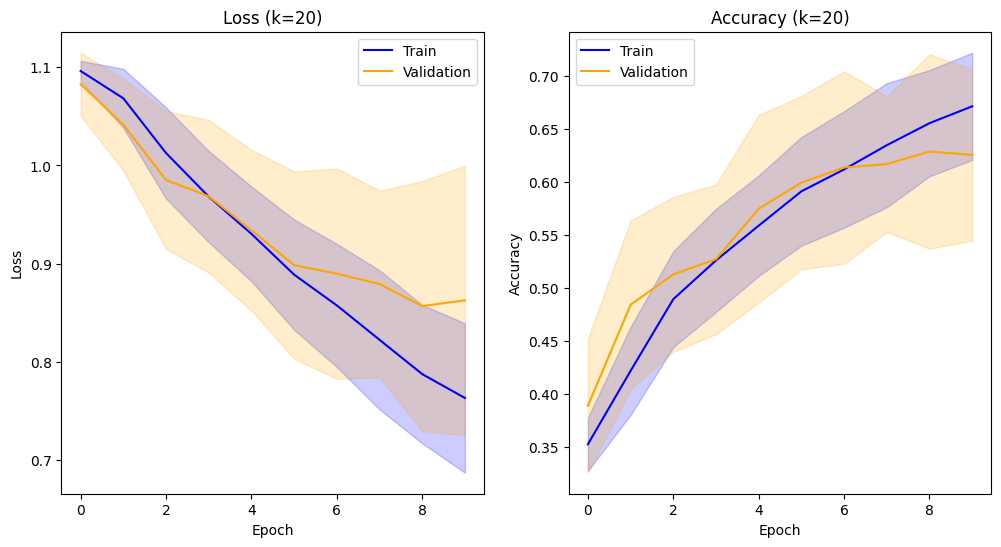

Précision : moyenne=62.540% écart-type=8.084%, k=20
Found 1800 files belonging to 3 classes.
Using 1260 files for training.
Found 1800 files belonging to 3 classes.
Using 540 files for validation.
Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.3300 - loss: 1.1007 - val_accuracy: 0.2540 - val_loss: 1.1042
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.3300 - loss: 1.0990 - val_accuracy: 0.3651 - val_loss: 1.0978
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.3342 - loss: 1.0987 - val_accuracy: 0.3651 - val_loss: 1.0985
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.3183 - loss: 1.0987 - val_accuracy: 0.3651 - val_loss: 1.0990
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.3358 - loss: 1.0986 - val_accuracy: 0.3651 - val_loss: 1.0990
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.3283 - loss: 1.0986 - val_accuracy: 0.2540 - val_loss: 1.0991
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 

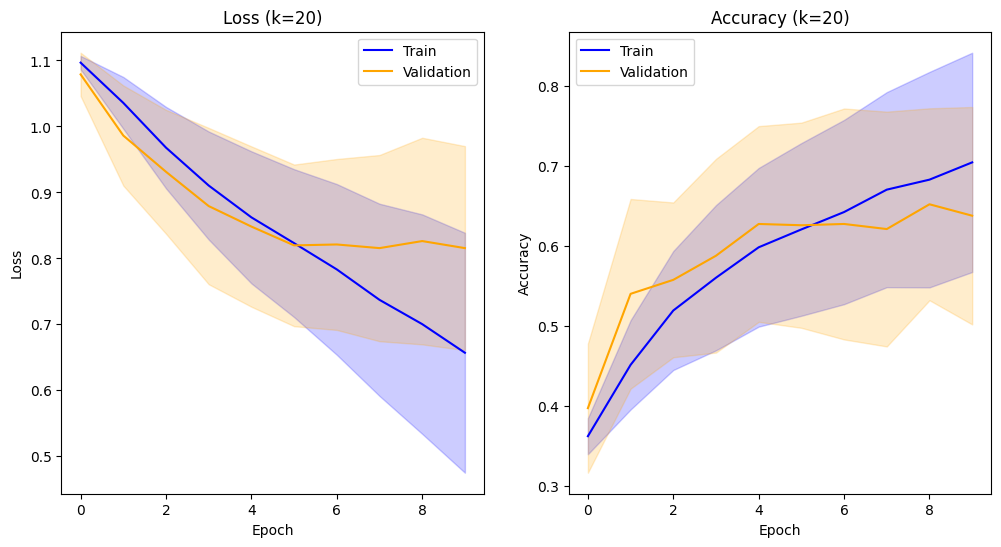

Précision : moyenne=63.810% écart-type=13.586%, k=20
Found 1800 files belonging to 3 classes.
Using 1260 files for training.
Found 1800 files belonging to 3 classes.
Using 540 files for validation.
Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3500 - loss: 1.0943 - val_accuracy: 0.3968 - val_loss: 1.0865
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4277 - loss: 1.0641 - val_accuracy: 0.5397 - val_loss: 1.0367
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5079 - loss: 1.0143 - val_accuracy: 0.4762 - val_loss: 1.0334
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5848 - loss: 0.9432 - val_accuracy: 0.5714 - val_loss: 0.9298
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5881 - loss: 0.8828 - val_accuracy: 0.6667 - val_loss: 0.9040
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6032 - loss: 0.8822 - val_accuracy: 0.6190 - val_loss: 0.8947
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s

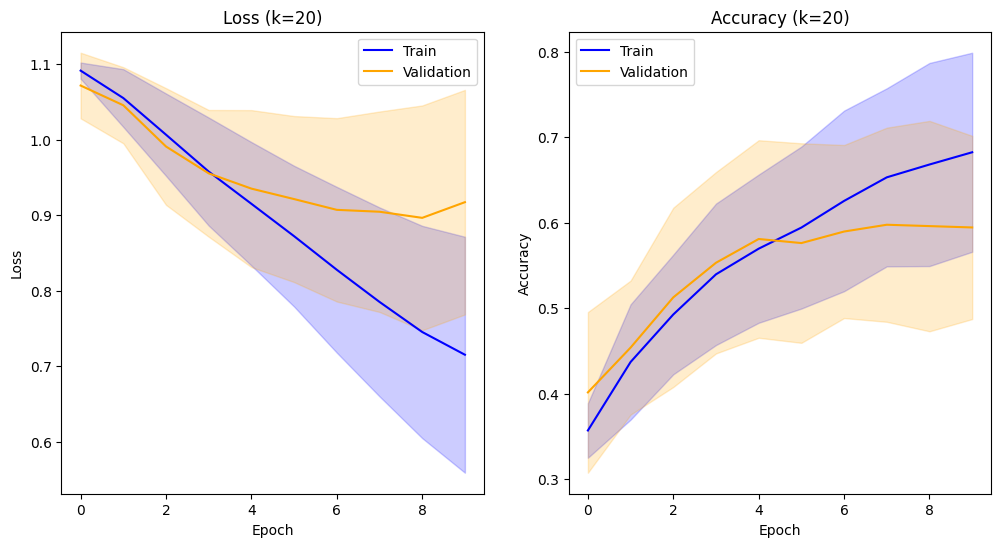

Précision : moyenne=59.444% écart-type=10.713%, k=20


In [26]:
k=20 # Nombre de folds
epochs=10 # Nombre d'epochs
shapeinput=(64, 64, 3) # Format de l'image
for i in range(3):
    run_evaluation(i, k, epochs)

## train each

In [ ]:
model1 = define_model1()
model2 = define_model2()
model3 = define_model3()


model1.fit(X_train, y_train, epochs=10, batch_size=32,
            validation_data=(X_test, y_test), verbose=1)
model2.fit(X_train, y_train, epochs=10, batch_size=32,
            validation_data=(X_test, y_test), verbose=1)
model3.fit(X_train, y_train, epochs=10, batch_size=32,
            validation_data=(X_test, y_test), verbose=1)

